# Data Exploration

### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from tqdm.notebook import tqdm

tqdm.pandas()

### 2. Explore tweets of politicians

#### Import data

In [2]:
tweets_scraped = pd.read_csv("../data/raw/tweets_scraped.csv")

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Check data

In [3]:
tweets_scraped.head()

,datetime,tweet_id,text,username,name,reply_count,retweet_count,like_count,party
0,2022-01-18 11:58:18+00:00,1483408404173500416,Der neuen Präsidentin des @Europarl_DE @Robert...,rbrinkhaus,Ralph Brinkhaus,3.0,3,41.0,CDU
1,2021-12-24 09:06:37+00:00,1474305500472922113,Ich wünsche Ihnen ein frohes und gesegnetes We...,rbrinkhaus,Ralph Brinkhaus,26.0,5,82.0,CDU
2,2021-12-17 13:41:57+00:00,1471838074413924356,Herzlichen Glückwunsch @_FriedrichMerz. Alles ...,rbrinkhaus,Ralph Brinkhaus,132.0,22,607.0,CDU
3,2021-12-15 12:34:54+00:00,1471096426381942791,@dieLinke Die Rede in voller Länge gibt es in ...,rbrinkhaus,Ralph Brinkhaus,7.0,2,13.0,CDU
4,2021-12-15 11:58:36+00:00,1471087291913449472,Eine Demokratie braucht eine starke #Oppositio...,rbrinkhaus,Ralph Brinkhaus,8.0,1,33.0,CDU


In [4]:
tweets_scraped.tail()

,datetime,tweet_id,text,username,name,reply_count,retweet_count,like_count,party
400275,2013-11-10 20:30:25+00:00,399635176701329408,@stefanb_ Die KandidatInnen haben die Unterstü...,ABaerbockArchiv,Annalena Baerbock (Archiv),1.0,0,0.0,Grüne
400276,2013-11-10 11:12:28+00:00,399494763264872448,You decide Europe - Vote now on: greenprimary.eu,ABaerbockArchiv,Annalena Baerbock (Archiv),1.0,0,1.0,Grüne
400277,2013-11-09 14:55:36+00:00,399188527256055809,Engagierte Diskussion zu europ. &amp; globalen...,ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,0,1.0,Grüne
400278,2013-11-08 11:24:22+00:00,398772981528150016,Spannende Klausur der Europagruppe von @Die_Gr...,ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,0,3.0,Grüne
400279,2013-11-07 13:53:38+00:00,398448157262381057,"Hoffe, die Kommission macht gut Druck gegen di...",ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,3,4.0,Grüne


In [5]:
tweets_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400280 entries, 0 to 400279
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       400280 non-null  object 
 1   tweet_id       400278 non-null  object 
 2   text           400278 non-null  object 
 3   username       341102 non-null  object 
 4   name           341102 non-null  object 
 5   reply_count    341102 non-null  float64
 6   retweet_count  341102 non-null  object 
 7   like_count     341100 non-null  float64
 8   party          341100 non-null  object 
dtypes: float64(2), object(7)
memory usage: 27.5+ MB


In [6]:
tweets_scraped.describe()

,reply_count,like_count
count,341102.000000,341100.000000
mean,17.121946,135.328531
std,84.147600,732.384448
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,5.000000
75%,6.000000,47.000000
max,9635.000000,106464.000000


#### Drop missing data

We drop all records with missing data, as we cannot use this data for our analysis.

In [7]:
tweets_scraped.dropna(inplace = True)

In [8]:
tweets_scraped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341100 entries, 0 to 400279
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       341100 non-null  object 
 1   tweet_id       341100 non-null  object 
 2   text           341100 non-null  object 
 3   username       341100 non-null  object 
 4   name           341100 non-null  object 
 5   reply_count    341100 non-null  float64
 6   retweet_count  341100 non-null  object 
 7   like_count     341100 non-null  float64
 8   party          341100 non-null  object 
dtypes: float64(2), object(7)
memory usage: 26.0+ MB


#### Clean names

In [9]:
usernames_to_fullname = {'rbrinkhaus': 'Ralph Brinkhaus', 'groehe': 'Hermann Gröhe', 
                         'NadineSchoen': 'Nadine Schön', 'n_roettgen': 'Norbert Röttgen',
                         'peteraltmaier': 'Peter Altmaier', 'jensspahn': 'Jens Spahn', 
                         'MatthiasHauer': 'Matthias Hauer', 'c_lindner': 'Christian Lindner',
                         'MarcoBuschmann': 'Marco Buschmann', 'starkwatzinger': 'Bettina Stark-Watzinger',
                         'Lambsdorff': 'Alexander Graf Lambsdorff', 'johannesvogel': 'Johannes Vogel',
                         'KonstantinKuhle': 'Konstantin Kuhle', 'MAStrackZi': 'Marie-Agnes Strack-Zimmermann',
                         'larsklingbeil': 'Lars Klingbeil', 'EskenSaskia': 'Saskia Esken',
                         'hubertus_heil': 'Hubertus Heil', 'HeikoMaas': 'Heiko Maas',
                         'MartinSchulz': 'Martin Schulz', 'KarambaDiaby': 'Karamba Diaby',
                         'Karl_Lauterbach': 'Karl Lauterbach', 'SteffiLemke': 'Steffi Lemke',
                         'cem_oezdemir': 'Cem Özdemir', 'GoeringEckardt': 'Katrin Göring-Eckardt',
                         'KonstantinNotz': 'Konstantin von Notz', '6': 'Konstantin von Notz',
                         'BriHasselmann': 'Britta Haßelmann', 'svenlehmann': 'Sven Lehmann',
                         'ABaerbock': 'Annalena Baerbock', 'ABaerbockArchiv': 'Annalena Baerbock',
                         'SWagenknecht': 'Sahra Wagenknecht', 'b_riexinger': 'Bernd Riexinger',
                         'NiemaMovassat': 'Niema Movassat', 'jankortemdb': 'Jan Korte',
                         'DietmarBartsch': 'Dietmar Bartsch', 'GregorGysi': 'Gregor Gysi',
                         'SevimDagdelen': 'Sevim Dağdelen', 'Alice_Weidel': 'Alice Weidel',
                         'Beatrix_vStorch': 'Beatrix von Storch', 'JoanaCotar': 'Joana Cotar',
                         'StBrandner': 'Stephan Brandner', 'Tino_Chrupalla': 'Tino Chrupalla',
                         'GtzFrmming': 'Götz Frömming', '3': 'Götz Frömming', 'Leif_Erik_Holm': 'Leif-Erik Holm'}

In [10]:
tweets_scraped["full_name"] = tweets_scraped.username.replace(usernames_to_fullname)

#### Check date of tweets

In [11]:
tweets_scraped["date"] = pd.to_datetime(tweets_scraped["datetime"], format = "%Y-%m-%d").dt.date

In [12]:
tweets_scraped.date.min()

datetime.date(2008, 8, 23)

In [13]:
tweets_scraped.date.max()

datetime.date(2022, 1, 20)

As we do not need data for the whole timespan of the scraped tweets, we can drop tweeets after and before. 

In [14]:
tweets_subset = tweets_scraped[np.logical_and(tweets_scraped.date >= pd.Timestamp("24.10.2017"), tweets_scraped.date <= pd.Timestamp("07.05.2021"))]

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [15]:
tweets_subset.date.min()

datetime.date(2017, 10, 24)

In [16]:
tweets_subset.date.max()

datetime.date(2021, 7, 5)

#### Checkt text

In [17]:
tweets_subset["tweet_length"] = tweets_subset.text.progress_apply(len)

  0%|          | 0/164460 [00:00<?, ?it/s]

/var/folders/zx/r0fw_tq95g13lvmt5x8bp_vr0000gn/T/ipykernel_62461/123666153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_subset["tweet_length"] = tweets_subset.text.progress_apply(len)


We identified tweets with very few characters. They will be sorted in the preprocessing.

In [18]:
tweets_subset.tweet_length.min()

1

#### Checkt text

When checking the distribution of tweets, we can see differences, but they are not heavily impeding our results.

In [19]:
tweets_subset.groupby("party").size()

party
AFD      32878
CDU      16687
FDP      41668
Grüne    19314
Linke    21582
SPD      32331
dtype: int64

#### Check politicians

We see significant differences between the number of tweets per politician ranging from nearly 29665 to 658. This will be an aspect we have to consider in our work.

<AxesSubplot:xlabel='full_name'>

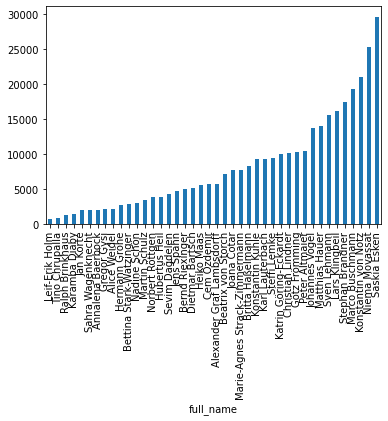

In [20]:
tweets_scraped.groupby('full_name')['tweet_id'].size().sort_values().plot(kind='bar')

#### Check date

<AxesSubplot:xlabel='date'>

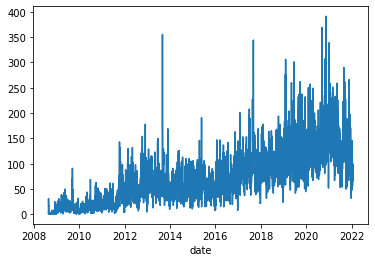

In [21]:
tweets_scraped.groupby('date')['tweet_id'].size().plot()

We see an strongly increasing trend of tweets per day. This is caused by two new parties entering the bundestag in 2017.

#### Check text

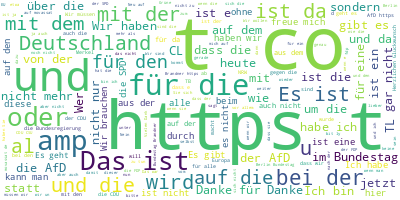

In [22]:
long_string_tweets = ' '.join(tweets_scraped["text"].tolist())
wordcloud_tweets = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_tweets.generate(long_string_tweets)
wordcloud_tweets.to_image()

In [23]:
counter_tweets = Counter(long_string_tweets.split())

In [24]:
counter_tweets.most_common(10)

[('die', 123222),
 ('der', 116779),
 ('und', 108207),
 ('in', 78726),
 ('ist', 62979),
 ('für', 56783),
 ('nicht', 53156),
 ('das', 49531),
 ('zu', 49503),
 ('den', 42515)]

#### Drop unneeded data

In [25]:
tweets_subset.drop(['datetime', 'tweet_id', 'username','name', 'reply_count',
                    'tweet_length'], axis = 1, inplace = True)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Export data

In [26]:
tweets_subset.to_csv("../data/interim/tweets_explored.csv", index = False)

### 3. Explore speeches of politicians

#### Import data

In [27]:
speeches_retrieved = pd.read_csv("../data/raw/speeches_retrieved.csv")

#### Check data

In [28]:
speeches_retrieved.head()

,id,session,electoral_term,first_name,last_name,politician_id,speech_content,fraction_id,document_url,position_short,position_long,date,search_speech_content
0,794153,2,18,Petra,Sitte,11003848,Danke. - Ich möchte gerne etwas zu den Abstimm...,6,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,Member of Parliament,NaN,2013-11-18,"'0':16 '000':177 '1':87,176 '10':529 '11':554 ..."
1,794071,2,18,Marieluise,Beck,11002624,\nHerr Präsident! Liebe Kolleginnen und Kolleg...,3,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,Member of Parliament,NaN,2013-11-18,'0':175 '1':212 '18':577 '2':325 '2009':185 '2...
2,794511,3,18,Karl,Schiewerling,11003839,Herr Präsident! Meine Damen und Herren! Liebe\...,4,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,Member of Parliament,NaN,2013-11-28,'0':28 '1':151 '10':435 '13':222 '1946':232 '2...
3,795916,11,18,Andrea,Nahles,11003196,\nJa.\n\n,-1,https://dip21.bundestag.de/dip21/btp/18/18011.pdf,Minister,bundesministerin für arbeit und soziales,2014-01-30,'ja':1
4,795917,11,18,Peter,Hintze,11000907,Bitte.\n\n,-1,https://dip21.bundestag.de/dip21/btp/18/18011.pdf,Presidium of Parliament,vizepräsident,2014-01-30,'bitt':1


In [29]:
speeches_retrieved.tail()

,id,session,electoral_term,first_name,last_name,politician_id,speech_content,fraction_id,document_url,position_short,position_long,date,search_speech_content
113613,1060953,228,19,Helge,Lindh,11004802,\n\nWie bitte?,23,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,'bitt':2
113614,1060954,228,19,Petra,Pau,11003206,\n\nSie müssen das jetzt verkürzen und zum Pun...,-1,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Presidium of Parliament,Vizepräsidentin,2021-05-07,'komm':9 'muss':2 'punkt':8 'verkurz':5
113615,1060955,228,19,Helge,Lindh,11004802,"\n\nGut, ich beschränke mich auf einen Satz:\n...",23,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,"'0':79 '1':108 'ab':13 'abscheulich':33,63 'be..."
113616,1060956,228,19,Petra,Pau,11003206,\n\nDas Wort hat der Kollege Tankred Schipansk...,-1,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Presidium of Parliament,Vizepräsidentin,2021-05-07,'0':11 'cdu/csu-fraktion':10 'kolleg':5 'schip...
113617,1060957,228,19,Tankred,Schipanski,11004143,\n\nVielen Dank. – Frau Präsidentin! Liebe Kol...,4,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,'0':63 '1':117 '1945':124 '1989':148 '2':282 '...


In [30]:
speeches_retrieved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113618 entries, 0 to 113617
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     113618 non-null  int64 
 1   session                113618 non-null  int64 
 2   electoral_term         113618 non-null  int64 
 3   first_name             113609 non-null  object
 4   last_name              113615 non-null  object
 5   politician_id          113618 non-null  int64 
 6   speech_content         113565 non-null  object
 7   fraction_id            113618 non-null  int64 
 8   document_url           113618 non-null  object
 9   position_short         113618 non-null  object
 10  position_long          61370 non-null   object
 11  date                   113618 non-null  object
 12  search_speech_content  113498 non-null  object
dtypes: int64(5), object(8)
memory usage: 11.3+ MB


In [31]:
speeches_retrieved.describe()

,id,session,electoral_term,politician_id,fraction_id
count,1.136180e+05,113618.000000,113618.000000,1.136180e+05,113618.000000
mean,9.330901e+05,121.799706,18.536517,1.082260e+07,3.207265
std,1.060773e+05,67.970725,0.498667,1.398117e+06,7.036039
min,7.940260e+05,1.000000,18.000000,-1.000000e+00,-1.000000
25%,8.224302e+05,62.000000,18.000000,1.100202e+07,-1.000000
50%,1.004148e+06,123.000000,19.000000,1.100321e+07,-1.000000
75%,1.032553e+06,180.000000,19.000000,1.100418e+07,4.000000
max,1.060957e+06,245.000000,19.000000,1.100498e+07,23.000000


#### Check date

In [32]:
speeches_retrieved["date"] = pd.to_datetime(speeches_retrieved["date"], format = "%Y-%m-%d").dt.date

We do not cover the whole periods of the 19. bundestag based on the restrictions of the database.

In [33]:
speeches_retrieved.date.max()

datetime.date(2021, 5, 7)

In [34]:
speeches_retrieved.date.min()

datetime.date(2013, 10, 22)

#### Missing values

In [35]:
speeches_retrieved.dropna(subset = ["speech_content"], inplace = True)

#### Check politicians

In [36]:
speeches_retrieved["full_name"] = speeches_retrieved["first_name"] + " " + speeches_retrieved["last_name"]

In [37]:
len(speeches_retrieved["full_name"].unique())

1760

In [38]:
speeches_subset = speeches_retrieved[speeches_retrieved.full_name.isin(tweets_subset.full_name.unique())]

In [39]:
len(speeches_subset["full_name"].unique())

42

In [40]:
speeches_subset.shape

(4099, 14)

#### Add party

In [41]:
fullname_to_party = {'Ralph Brinkhaus': 'CDU', 'Hermann Gröhe': 'CDU', 'Nadine Schön': 'CDU', 
                     'Norbert Röttgen': 'CDU', 'Peter Altmaier': 'CDU', 'Jens Spahn': 'CDU', 
                     'Matthias Hauer': 'CDU', 'Christian Lindner': 'FDP', 'Marco Buschmann': 'FDP',
                     'Bettina Stark-Watzinger': 'FDP', 'Alexander Graf Lambsdorff': 'FDP', 'Johannes Vogel': 'FDP',
                     'Konstantin Kuhle': 'FDP', 'Marie-Agnes Strack-Zimmermann': 'FDP', 'Lars Klingbeil': 'SPD',
                     'Saskia Esken': 'SPD', 'Hubertus Heil': 'SPD', 'Heiko Maas': 'SPD', 'Martin Schulz': 'SPD', 
                     'Karamba Diaby': 'SPD', 'Karl Lauterbach': 'SPD', 'Steffi Lemke': 'Grüne',
                     'Cem Özdemir': 'Grüne', 'Katrin Göring-Eckardt': 'Grüne', 'Konstantin von Notz': 'Grüne',
                     'Britta Haßelmann': 'Grüne', 'Sven Lehmann': 'Grüne', 'Annalena Baerbock': 'Grüne',
                     'Sahra Wagenknecht': 'Linke', 'Bernd Riexinger': 'Linke', 'Niema Movassat': 'Linke', 
                     'Jan Korte': 'Linke', 'Dietmar Bartsch': 'Linke', 'Gregor Gysi': 'Linke', 
                     'Sevim Dağdelen': 'Linke', 'Alice Weidel': 'AFD', 'Beatrix von Storch': 'AFD', 
                     'Joana Cotar': 'AFD', 'Stephan Brandner': 'AFD', 'Tino Chrupalla': 'AFD',
                     'Götz Frömming': 'AFD', 'Leif-Erik Holm': 'AFD'}

In [42]:
speeches_subset["party"] = speeches_subset.full_name.replace(fullname_to_party)

/var/folders/zx/r0fw_tq95g13lvmt5x8bp_vr0000gn/T/ipykernel_62461/3018675369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches_subset["party"] = speeches_subset.full_name.replace(fullname_to_party)


#### Check politicians

We see significant differences between the number of tweets per politician ranging from nearly 29665 to 658. This will be an aspect we have to consider in our work.

<AxesSubplot:xlabel='full_name'>

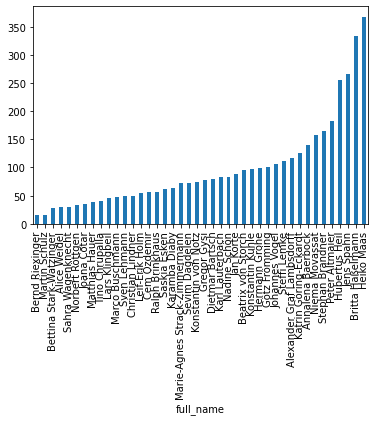

In [43]:
speeches_subset.groupby('full_name')['id'].size().sort_values().plot(kind='bar')

#### Check date

<AxesSubplot:xlabel='date'>

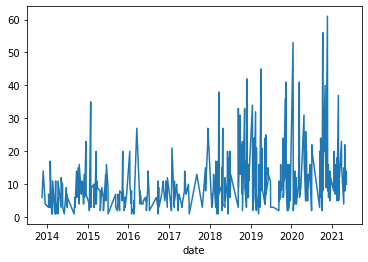

In [44]:
speeches_subset.groupby('date')['id'].size().plot()

We see an strongly increasing trend of tweets per day. This is caused by two new parties entering the bundestag in 2017.

#### Check speech content

In [45]:
speeches_subset.groupby("party").size()

party
AFD      521
CDU      758
FDP      518
Grüne    889
Linke    521
SPD      892
dtype: int64

In [46]:
columns_drop_speeches = ['id', 'session', 'electoral_term', 'first_name', 'last_name', 'politician_id', 
                         'fraction_id', 'document_url', 'position_short', 'position_long', 'search_speech_content']

In [47]:
speeches_subset.drop(columns_drop_speeches, axis = 1, inplace = True)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Text analyis

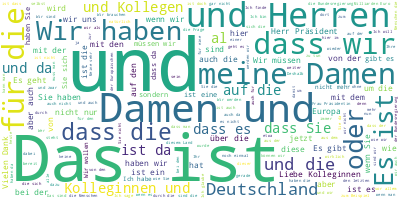

In [48]:
long_string_speeches = ' '.join(speeches_subset["speech_content"].tolist())
wordcloud_speeches = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_speeches.generate(long_string_speeches)
wordcloud_speeches.to_image()

In [49]:
counter_speeches = Counter(long_string_speeches.split())

In [50]:
counter_speeches.most_common(10)

[('die', 54280),
 ('und', 47773),
 ('der', 43156),
 ('in', 31093),
 ('das', 24055),
 ('wir', 22639),
 ('ist', 21431),
 ('dass', 18914),
 ('nicht', 18793),
 ('zu', 18246)]

#### Export data

In [51]:
speeches_subset.to_csv("../data/interim/speeches_explored.csv", index = False)